## 1.3 Matplotlib

[Matplotlib](http://matplotlib.org/) adds Matlab-style graphics to Python and is well-integrated with the IPython notebook

_Note_: A lot of these examples are taken from the Matplotlib gallery

In [1]:
# Import matplotlib
from matplotlib import pyplot as plt

# IPython magic for showing plots inline
%matplotlib inline

# Other useful imports
import numpy as np
import math

[0, 2, 0, 5]

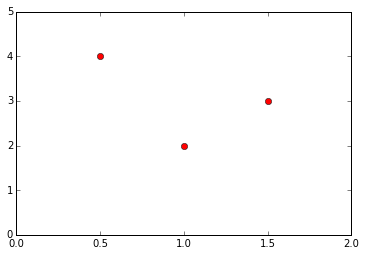

In [2]:
# Plot a few points
pts = np.array([[1, 2], [1.5, 3], [0.5, 4]])
x = pts[:,0]
y = pts[:,1]
plt.plot(x, y, 'ro')

xmin, xmax, ymin, ymax = 0, 2, 0, 5
plt.axis([xmin, xmax, ymin, ymax])

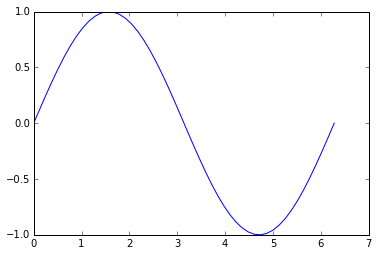

In [3]:
# Simple plot of sin(x)
x = np.linspace(0.0, 2*math.pi, num=50)
y = np.sin(x)
plt.plot(x,y)

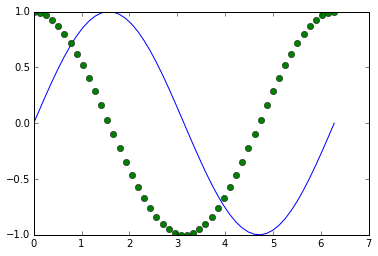

In [4]:
# Two plots, one figure
x = np.linspace(0.0, 2*math.pi, num=50)
plt.plot(x, np.sin(x), 'b-', x, np.cos(x), 'go')

**Ex 1.3.1  Earlier, we minimized the function f(x) below and found it had a minimum at $x=-1.25$.  Plot this function and verify that this result is correct.**

$$
f(x) = 2 x^2 + 5 x - 7.
$$

We can customize the plots quite a bit.  Below are some basic examples.  We'll use the graph of $\sin(x)$ for all the examples.

In [5]:
x = np.linspace(0.0, 2*math.pi, num=50)
y = np.sin(x)

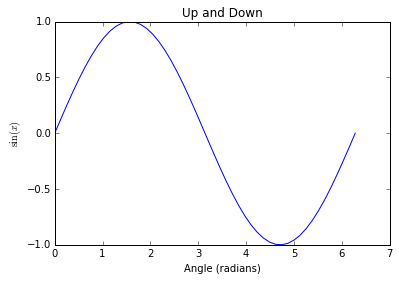

In [6]:
# Adding labels to the axes and a title
plt.plot(x, np.sin(x))
plt.xlabel("Angle (radians)")
plt.ylabel("$\sin(x)$")
plt.title("Up and Down")

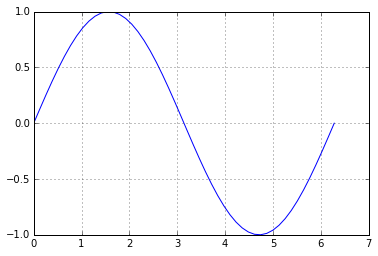

In [7]:
# Adding a grid
plt.plot(x, y)
plt.grid(True)

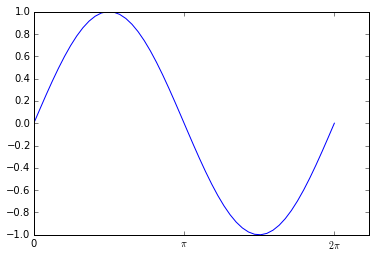

In [8]:
# Changing tick marks
# Tip: use ; at the end to hide text output in IPython
plt.plot(x, y)
plt.xticks((0, math.pi, 2*math.pi), ('0', '$\pi$', '$2\pi$'))
plt.yticks(np.linspace(-1.0, 1.0, 11));

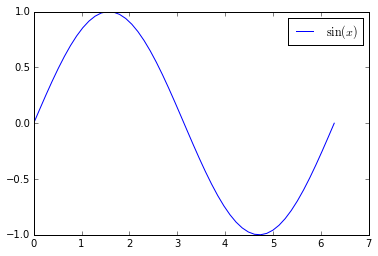

In [9]:
# Add a legend
plt.plot(x, y, label='$\sin(x)$')
plt.legend(loc='upper right')

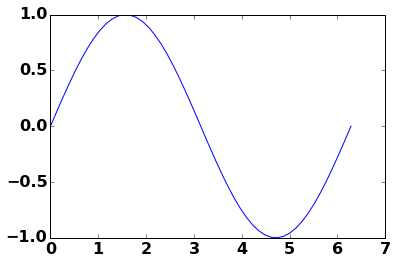

In [10]:
# Change font size
plt.rc('font', weight='bold', size=16)
plt.plot(x, y)

In [11]:
plt.rc('font', weight='normal', size=10)  # Restore defaults afterwards

In general, `matplotlib` is a *very broad* package with lots of options.  The best way to figure out how to do something is honestly _[Stack Overflow](http://www.stackoverflow.com)_ or the [Matplotlib gallery](http://matplotlib.org/users/screenshots.html).

Let's just see a few more examples of other kinds of plots that are available

## Bar charts

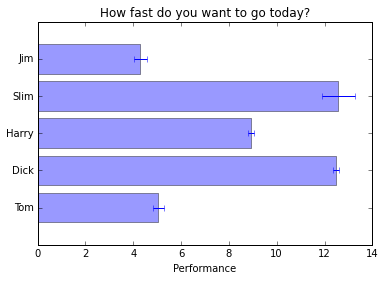

In [12]:
# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('Performance')
plt.title('How fast do you want to go today?')

plt.show()

## Histograms

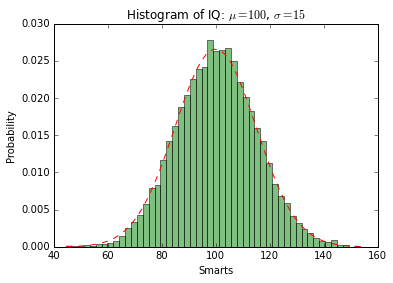

In [13]:
# example data
mu = 100 # mean of distribution
sigma = 15 # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
from matplotlib import mlab
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

## Box plots

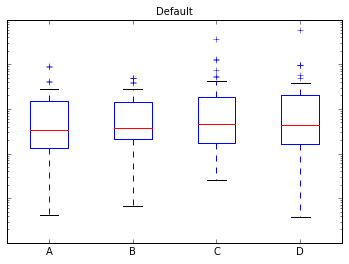

In [14]:
# fake data
np.random.seed(937)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = ['A', 'B', 'C', 'D']

fig, ax = plt.subplots()
plt.boxplot(data, labels=labels)
ax.set_title('Default', fontsize=10)
ax.set_yscale('log')
ax.set_yticklabels([])

plt.show()

## Density plots

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.py:2264: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  different = bool(ours != theirs)


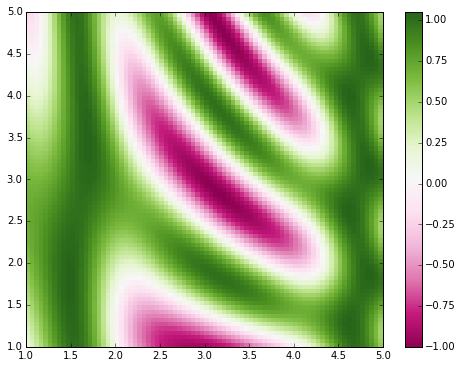

In [15]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


dx, dy = 0.05, 0.05
x, y = np.mgrid[1:5 + dx:dx, 1:5 + dy:dy]  # generate 2 2d grids for the x & y bounds
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]

plt.figure(figsize=(8,6))
im = plt.pcolormesh(x, y, z, cmap=plt.get_cmap('PiYG'))
plt.colorbar()
plt.savefig('myfigure.pdf')     # !!! <-- Here's how you export a figure
plt.show()